In [310]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn import manifold, datasets

In [311]:
from sklearn import datasets

# Gene Expression with Raw reads

In [312]:
expression_file = "/data8t/mtx/scSNV/dataset_v2/GSE57872/data/quantification_stats/gene_expression_matrix/gene_expression_matrix.csv"
label_file = "/data8t/mtx/scSNV/dataset_v2/GSE57872/data/label/GSE57872_processed_label.csv"
exp_profile = pd.read_csv(expression_profile,index_col=0).transpose()
label_info = pd.read_csv(label_file,index_col=0)

In [313]:
exp_profile.shape

(875, 57820)

In [314]:
# only consider single cell data, filter out bulk data
filtered_type = list(label_info['label'].value_counts()[label_info['label'].value_counts() == 96].index)
label_info_filtered = label_info[label_info['label'].isin(filtered_type)]
# change index for label_index for consistence
label_info_filtered = label_info_filtered.set_index('run_accession')
label_info_filtered.index.name = 'Geneid'

In [315]:
label_info_filtered.shape

(864, 2)

In [316]:
# filter single cell from expression matrix
exp_profile_filtered = exp_profile.loc[label_info_filtered.index.values,]

In [317]:
exp_profile_filtered.shape

(864, 57820)

In [318]:
# label for cells
cell_labels = label_info_filtered.loc[exp_profile_filtered.index.values,]['label'].values

## PCA

In [319]:
# do pca for gene expression profile with raw read counts
pca = PCA(n_components=2)
pca.fit(exp_profile_filtered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [320]:
print(pca.explained_variance_ratio_)

[0.44176743 0.1305872 ]


In [321]:
# draw figure
X_r = pca.transform(exp_profile_filtered)
x_1 = X_r.ravel(order='F')[:X_r.shape[0]]
x_2 = X_r.ravel(order='F')[X_r.shape[0]:]

In [347]:
for color, target_name in zip(colors, filtered_type):
    print(color, target_name)

#000000 MGH29
#dfc5fe CSC8
#e50000 MGH30L
#735c12 CSC6
#a2cffe MGH26
#ff9408 MGH26-2
#8f1402 MGH31
#0cff0c MGH30
#fdaa48 MGH28


Text(0.5, 1.0, 'PCA with gene expression (raw reads)')

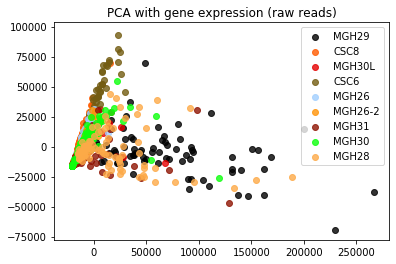

In [348]:
colors = ['#000000', '#ff5b00', '#e50000', '#735c12', '#a2cffe', '#ff9408', '#8f1402', '#0cff0c','#fdaa48']
for color, target_name in zip(colors, filtered_type):
    plt.scatter(x_1[cell_labels == target_name], x_2[cell_labels == target_name], color=color, alpha=.8, 
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA with gene expression (raw reads)')

Text(0.5, 1.0, 'PCA with gene expression (raw reads-only patients)')

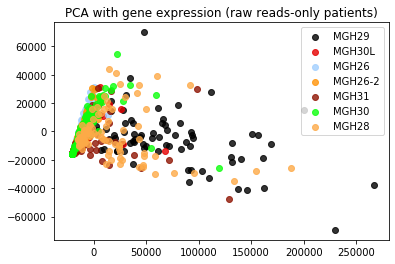

In [349]:
# only patients cell
for color, target_name in zip(colors, filtered_type):
    if ('MGH' in target_name):
        plt.scatter(x_1[cell_labels == target_name], x_2[cell_labels == target_name], color=color, alpha=.8, 
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA with gene expression (raw reads-only patients)')

Text(0.5, 1.0, 'PCA with gene expression (raw reads-without patients)')

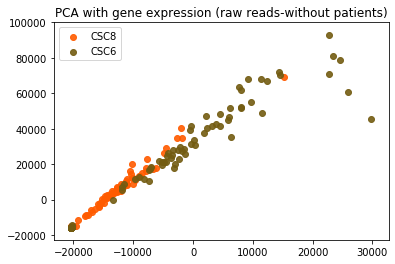

In [350]:
for color, target_name in zip(colors, filtered_type):
    if ('CSC' in target_name):
        plt.scatter(x_1[cell_labels == target_name], x_2[cell_labels == target_name], color=color, alpha=.9, 
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA with gene expression (raw reads-without patients)')

In [354]:
# only distinguish patients and non-patients
cell_labels_2_class = label_info_filtered.label.str.slice(stop=3).values
filtered_type_2_class = ['CSC','MGH']

Text(0.5, 1.0, 'PCA with gene expression（raw reads)')

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)


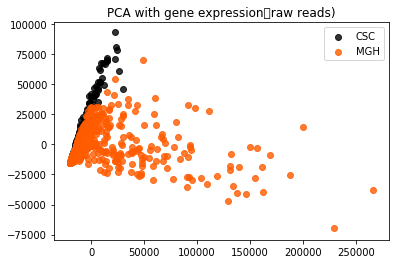

In [356]:
for color, target_name in zip(colors, filtered_type_2_class):
    plt.scatter(x_1[cell_labels_2_class == target_name], x_2[cell_labels_2_class == target_name], color=color, alpha=.8, 
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA with gene expression（raw reads)')

## tsne

In [360]:
tsne = manifold.TSNE(n_components=2, init='random',
                         random_state=0, perplexity=100)
y_tsne = tsne.fit_transform(exp_profile_filtered)

x_1_tsne = y_tsne.ravel(order='F')[:y_tsne.shape[0]]
x_2_tsne = y_tsne.ravel(order='F')[y_tsne.shape[0]:]

<Figure size 3600x2880 with 0 Axes>

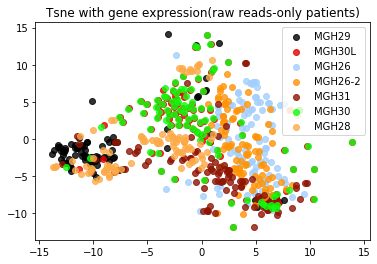

<Figure size 3600x2880 with 0 Axes>

In [369]:
for color, target_name in zip(colors, filtered_type):
    if ('MGH' in target_name):
        plt.scatter(x_1_tsne[cell_labels == target_name], x_2_tsne[cell_labels == target_name], color=color, alpha=.8, 
            label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Tsne with gene expression(raw reads-only patients)')
plt.figure(figsize=(50,40))

<Figure size 3600x2880 with 0 Axes>

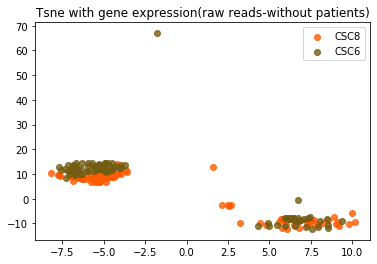

<Figure size 3600x2880 with 0 Axes>

In [370]:
for color, target_name in zip(colors, filtered_type):
    if ('CSC' in target_name):
        plt.scatter(x_1_tsne[cell_labels == target_name], x_2_tsne[cell_labels == target_name], color=color, alpha=.8, 
            label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Tsne with gene expression(raw reads-without patients)')
plt.figure(figsize=(50,40))

<Figure size 3600x2880 with 0 Axes>

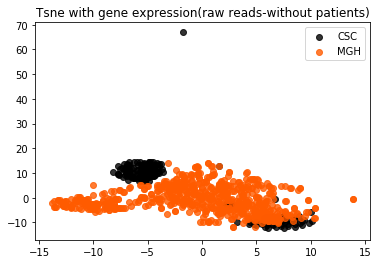

<Figure size 3600x2880 with 0 Axes>

In [372]:
for color, target_name in zip(colors, filtered_type_2_class):
    plt.scatter(x_1_tsne[cell_labels_2_class == target_name], x_2_tsne[cell_labels_2_class == target_name], color=color, alpha=.8, 
        label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Tsne with gene expression(raw reads-without patients)')
plt.figure(figsize=(50,40))

# Gene expression with MGH type


In [201]:
label_info_filtered_patients = label_info_filtered.loc[label_info_filtered['label'].str.contains('MGH'),]

In [202]:
label_info_filtered_patients

,label,single_or_bulk
Geneid,,
SRR1294492,MGH26,Single cell mRNA-seq
SRR1294493,MGH26,Single cell mRNA-seq
SRR1294494,MGH26,Single cell mRNA-seq
SRR1294495,MGH26,Single cell mRNA-seq
SRR1294496,MGH26,Single cell mRNA-seq
...,...,...
SRR1295159,MGH30L,Single cell mRNA-seq
SRR1295160,MGH30L,Single cell mRNA-seq
SRR1295161,MGH30L,Single cell mRNA-seq


In [206]:
exp_profile_patients = exp_profile.loc[label_info_filtered_patients.index.values,]

In [214]:
exp_profile_patients_tmp = exp_profile_patients.iloc[:,[0]].merge(label_info_filtered_patients, left_index=True,right_index=True)

In [224]:
filtered_type_patient = list(exp_profile_patients_tmp.label.value_counts().index)

In [233]:
pca_patients = PCA(n_components=2)
pca_patients.fit(exp_profile_patients)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [234]:
X_r_patients = pca_patients.transform(exp_profile_patients)

In [235]:
x_1_patient = X_r_patients.ravel(order='F')[:672]
x_2_patient = X_r_patients.ravel(order='F')[672:]

In [237]:
y_patient = exp_profile_patients_tmp.label.values

In [238]:
filtered_type_patient

['MGH29', 'MGH28', 'MGH30', 'MGH31', 'MGH26-2', 'MGH26', 'MGH30L']

In [239]:
for color, target_name in zip(colors, filtered_type_patient):
    print(color,target_name)

b MGH29
g MGH28
r MGH30
c MGH31
m MGH26-2
y MGH26
k MGH30L


Text(0.5, 1.0, 'PCA with gene expression only patients')

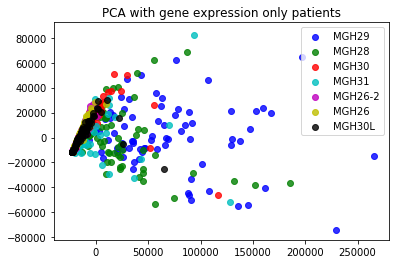

In [241]:
for color, target_name in zip(colors, filtered_type_patient):
    plt.scatter(x_1_patient[y_patient == target_name], x_2_patient[y_patient == target_name], color=color, alpha=.8, 
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA with gene expression only patients')

In [245]:
pca_patients.explained_variance_ratio_

array([0.51595639, 0.0968915 ])

# SNV matrix

In [161]:
import os
import sys
from os import listdir
from os.path import isfile, join
import pandas as pd
import functools 
from collections import defaultdict

In [162]:
input_folder = "/data8t/mtx/scSNV/dataset_v2/GSE57872/data/snv/cell_level_snv"
suffix = "_filtered_pass.vcf"

In [163]:
onlyfiles = [f for f in listdir(input_folder) if isfile(join(input_folder, f)) if f.endswith(suffix)]
min_shared_snv = 10
snv_dict = defaultdict(list)
sample_list = [] # to store sample names which will be column name of the dataframe
for f in onlyfiles:
    path_to_file = os.path.join(input_folder,f)
    current_file = open(path_to_file, 'r')
    sample_name = f.split("_")[0] 
    sample_list.append(sample_name)
    Lines = current_file.readlines()
    for line in Lines:
        if not line.startswith("#"):
            chrom = line.split()[0]
            position = line.split()[1]
            # here I need to use "__" to avoid the "_" in chr column
            snv_index = chrom + "__" + position
            snv_dict[snv_index].append(sample_name)
    current_file.close()

snv_filtered = defaultdict(list)
for snv in snv_dict:
    if len(snv_dict[snv]) >= min_shared_snv:
        snv_filtered[snv] = snv_dict[snv]
snv_filtered_name_list = list(snv_filtered.keys())

snv_df = pd.DataFrame(0, index=snv_filtered_name_list, columns=sample_list)

for snv in snv_filtered:
    for sample in snv_filtered[snv]:
        snv_df.loc[snv, sample] = 1
snv_df.index.name = "SNVid"

In [167]:
path_to_saved_snv_df = join("/data8t/mtx/scSNV/dataset_v2/GSE57872/data/snv", "GSE57872_snv_matrix_10.csv")
snv_df.to_csv(path_to_saved_snv_df)

In [169]:
snv_df = snv_df.transpose()

In [170]:
snv_df

SNVid,chr1__881627,chr1__888639,chr1__1247494,chr1__7901995,chr1__11148759,chr1__13940864,chr1__13942731,chr1__20826685,chr1__20826686,chr1__20826910,...,chr11__12758660,chr9__111801285,chr19__57845775,chr8__29330273,chr18__12836305,chr6__7661631,chr5__106815995,chr8__119047458,chr11__103079797,chr6__29858221
SRR1294716,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
SRR1294507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR1294878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR1295204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR1295109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1294593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR1294982,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
SRR1295307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR1295315,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
snv_df_tmp = snv_df.loc[label_info_filtered.index,]

In [177]:
snv_df_tmp

SNVid,chr1__881627,chr1__888639,chr1__1247494,chr1__7901995,chr1__11148759,chr1__13940864,chr1__13942731,chr1__20826685,chr1__20826686,chr1__20826910,...,chr11__12758660,chr9__111801285,chr19__57845775,chr8__29330273,chr18__12836305,chr6__7661631,chr5__106815995,chr8__119047458,chr11__103079797,chr6__29858221
Geneid,,,,,,,,,,,,,,,,,,,,,
SRR1294492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR1294493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR1294494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
SRR1294495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR1294496,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR1295351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR1295352,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR1295353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
pcasnv = PCA(n_components=2)
pcasnv.fit(snv_df_tmp)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [183]:
X_r_snv = pcasnv.transform(snv_df_tmp)

In [184]:
x_1_snv = X_r_snv.ravel(order='F')[:864]

In [185]:
x_2_snv = X_r_snv.ravel(order='F')[864:]

In [180]:
y_snv=snv_df_tmp.merge(label_info_filtered,left_index=True,right_index=True)['label'].values

Text(0.5, 1.0, 'PCA with SNV expression')

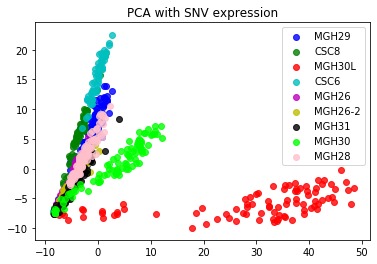

In [186]:
for color, target_name in zip(colors, filtered_type):
    plt.scatter(x_1_snv[y_snv == target_name], x_2_snv[y_snv == target_name], color=color, alpha=.8, 
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA with SNV expression')

Text(0.5, 1.0, 'PCA with SNV expression')

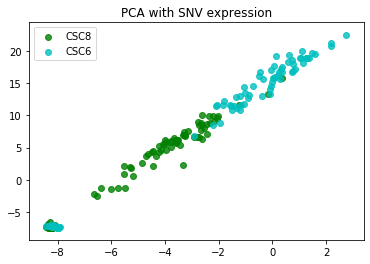

In [187]:
for color, target_name in zip(colors, filtered_type):
    if ('CSC' in target_name):
        plt.scatter(x_1_snv[y_snv == target_name], x_2_snv[y_snv == target_name], color=color, alpha=.8, 
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA with SNV expression')

Text(0.5, 1.0, 'PCA with SNV expression')

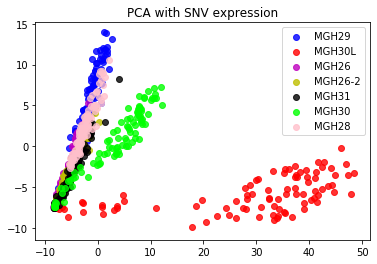

In [188]:
for color, target_name in zip(colors, filtered_type):
    if ('MGH' in target_name):
        plt.scatter(x_1_snv[y_snv == target_name], x_2_snv[y_snv == target_name], color=color, alpha=.8, 
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA with SNV expression')

Text(0.5, 1.0, 'PCA with snv expression')

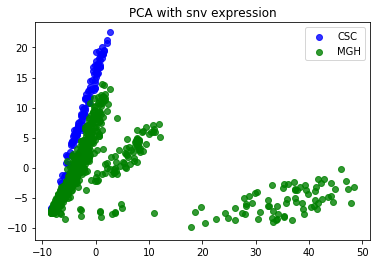

In [190]:
y2_snv = label_info_filtered.label.str.slice(stop=3).values
colors2 = ['b', 'g']
filtered_type2 = ['CSC','MGH']
for color, target_name in zip(colors2, filtered_type2):
    plt.scatter(x_1_snv[y2_snv == target_name], x_2_snv[y2_snv == target_name], color=color, alpha=.8, 
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA with snv expression')

In [247]:
pcasnv.explained_variance_ratio_

array([0.08370961, 0.0285132 ])

In [271]:
tsne_snv = manifold.TSNE(n_components=2, init='random',
                         random_state=0, perplexity=50)
y_tsne_snv = tsne_snv.fit_transform(snv_df_tmp)